# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.fromtimestamp(city_weather['dt']).split()[0]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
City not found. Skipping...
Processing Record 2 of Set 1 | kegayli
City not found. Skipping...
Processing Record 3 of Set 1 | iquitos
City not found. Skipping...
Processing Record 4 of Set 1 | east london
City not found. Skipping...
Processing Record 5 of Set 1 | bluff
City not found. Skipping...
Processing Record 6 of Set 1 | thompson
City not found. Skipping...
Processing Record 7 of Set 1 | albany
City not found. Skipping...
Processing Record 8 of Set 1 | lagoa
City not found. Skipping...
Processing Record 9 of Set 1 | lolua
City not found. Skipping...
Processing Record 10 of Set 1 | mopti
City not found. Skipping...
Processing Record 11 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 12 of Set 1 | anloga
City not found. Skipping...
Processing Record 13 of Set 1 | saskylakh
City not found. Skipping...
Processing Record 14 of Set 1 | lebu
City not found. Skipping...

In [72]:
import pprint
city_weather = requests.get(city_url).json()
pprint.pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 66.0449, 'lon': -17.3389},
 'dt': 1675389826,
 'id': 2629833,
 'main': {'feels_like': 264.86,
          'grnd_level': 992,
          'humidity': 85,
          'pressure': 993,
          'sea_level': 993,
          'temp': 270.64,
          'temp_max': 270.64,
          'temp_min': 270.64},
 'name': 'Husavik',
 'sys': {'country': 'IS', 'sunrise': 1675418421, 'sunset': 1675442752},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'gust': 6.29, 'speed': 5.39}}


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       564
Date          568
dtype: int64

In [58]:
# Converting "Max Temp" column from Kelvin to Celcius
addcol = []
for item in city_data_df["Max Temp"]:
    addcol.append(item-273.15)
city_data_df["Max Temp (C)"] = addcol
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,bengkulu,-3.8004,102.2655,299.65,75,99,2.60,ID,2023-02-02,26.50
1,mahebourg,-20.4081,57.7000,298.31,94,75,0.00,MU,2023-02-02,25.16
2,kavieng,-2.5744,150.7967,302.13,70,100,2.85,PG,2023-02-02,28.98
3,ushuaia,-54.8000,-68.3000,285.96,62,20,8.23,AR,2023-02-02,12.81
4,khatanga,71.9667,102.5000,236.13,100,56,0.90,RU,2023-02-02,-37.02


In [81]:
# Dropping Kelvin column and renaming
city_data_df = city_data_df[["City","Lat","Lng","Max Temp (C)","Humidity","Cloudiness","Wind Speed","Country","Date"]]
city_data_df = city_data_df.rename(columns={"Humidity":"Humidity (%)","Cloudiness":"Cloudiness (%)","Wind Speed":"Wind Speed (m/s)"})
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,bengkulu,-3.8004,102.2655,26.50,75,99,2.60,ID,2023-02-02
1,mahebourg,-20.4081,57.7000,25.16,94,75,0.00,MU,2023-02-02
2,kavieng,-2.5744,150.7967,28.98,70,100,2.85,PG,2023-02-02
3,ushuaia,-54.8000,-68.3000,12.81,62,20,8.23,AR,2023-02-02
4,khatanga,71.9667,102.5000,-37.02,100,56,0.90,RU,2023-02-02


In [82]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,bengkulu,-3.8004,102.2655,26.50,75,99,2.60,ID,2023-02-02
1,mahebourg,-20.4081,57.7000,25.16,94,75,0.00,MU,2023-02-02
2,kavieng,-2.5744,150.7967,28.98,70,100,2.85,PG,2023-02-02
3,ushuaia,-54.8000,-68.3000,12.81,62,20,8.23,AR,2023-02-02
4,khatanga,71.9667,102.5000,-37.02,100,56,0.90,RU,2023-02-02


In [83]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [84]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,bengkulu,-3.8004,102.2655,26.50,75,99,2.60,ID,2023-02-02
1,mahebourg,-20.4081,57.7000,25.16,94,75,0.00,MU,2023-02-02
2,kavieng,-2.5744,150.7967,28.98,70,100,2.85,PG,2023-02-02
3,ushuaia,-54.8000,-68.3000,12.81,62,20,8.23,AR,2023-02-02
4,khatanga,71.9667,102.5000,-37.02,100,56,0.90,RU,2023-02-02


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

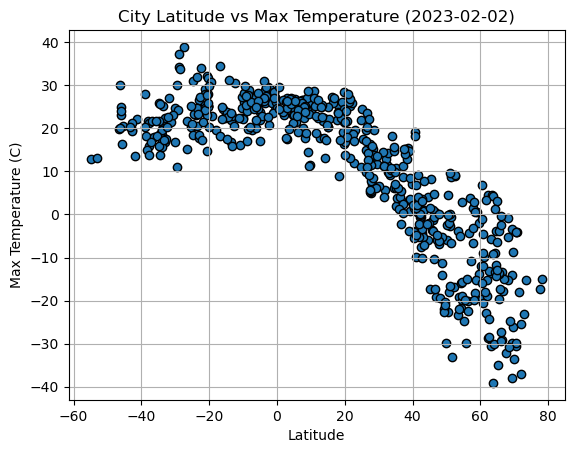

In [85]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp (C)"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (2023-02-02)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

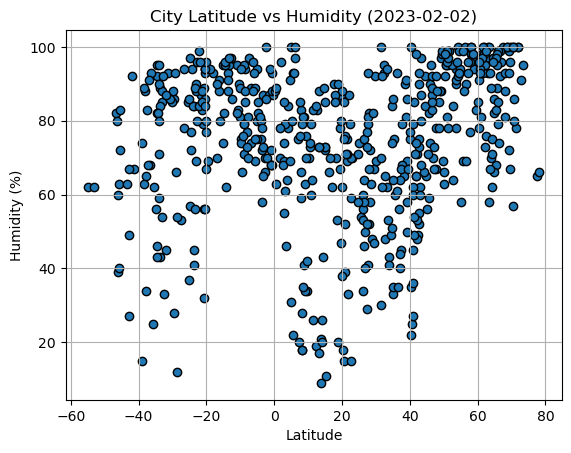

In [86]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity (%)"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-02-02)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

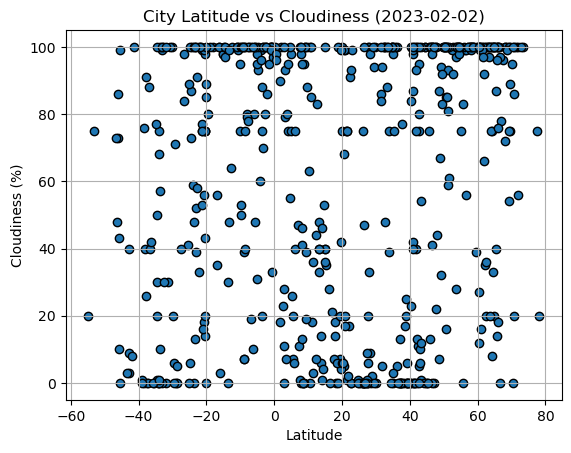

In [87]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness (%)"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-02-02)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

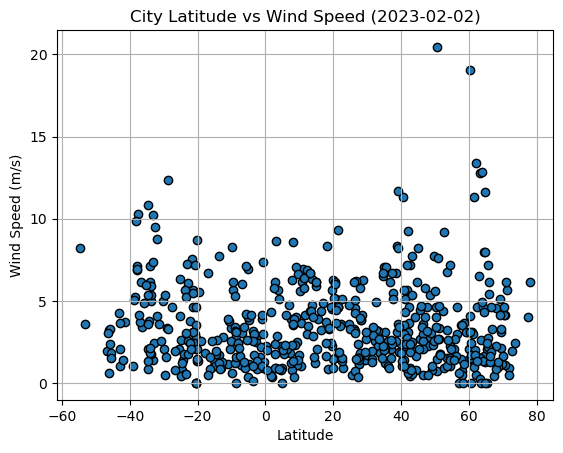

In [88]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed (m/s)"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-02-02)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
def lin2(ns,xlabel,ylabel):
    if ns == 'n':
        x = northern_hemi_df[xlabel]
        y = northern_hemi_df[ylabel]
    elif ns == 's':
        x = southern_hemi_df[xlabel]
        y = southern_hemi_df[ylabel]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    if pvalue < 0.05:
        print(f'The p-value is: {pvalue} < 0.05 -> Data is correlated')
    else:
        print(f'The p-value is: {pvalue} >= 0.05 -> Data is uncorrelated')
    print(f'The r-value is: {rvalue}')
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(100,100),xycoords='figure pixels',fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.show()
    return

In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
4,khatanga,71.9667,102.5000,-37.02,100,56,0.90,RU,2023-02-02
6,victoria,22.2855,114.1577,19.03,79,91,3.58,HK,2023-02-02
8,srednekolymsk,67.4500,153.6833,-32.12,100,96,0.45,RU,2023-02-02
9,hilo,19.7297,-155.0900,28.49,87,42,2.24,US,2023-02-02
14,tuktoyaktuk,69.4541,-133.0374,-38.00,67,75,3.09,CA,2023-02-02


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,bengkulu,-3.8004,102.2655,26.50,75,99,2.60,ID,2023-02-02
1,mahebourg,-20.4081,57.7000,25.16,94,75,0.00,MU,2023-02-02
2,kavieng,-2.5744,150.7967,28.98,70,100,2.85,PG,2023-02-02
3,ushuaia,-54.8000,-68.3000,12.81,62,20,8.23,AR,2023-02-02
5,mar del plata,-38.0023,-57.5575,21.72,88,40,7.15,AR,2023-02-02


###  Temperature vs. Latitude Linear Regression Plot

The p-value is: 2.507040885427957e-118 < 0.05 -> Data is correlated
The r-value is: -0.8703179767861075


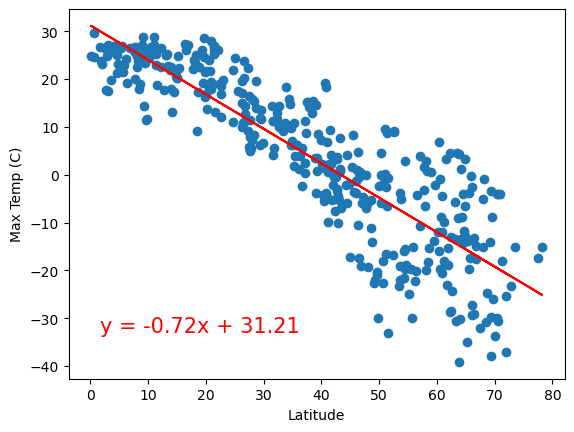

In [92]:
# Linear regression on Northern Hemisphere
lin2('n','Lat','Max Temp (C)')

The p-value is: 1.3887329787713143e-08 < 0.05 -> Data is correlated
The r-value is: 0.3992014348318779


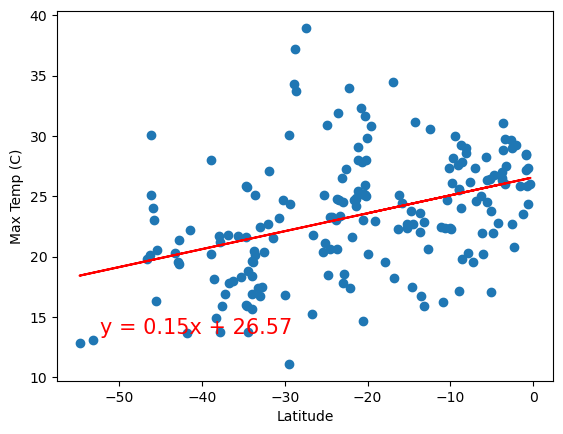

In [93]:
# Linear regression on Southern Hemisphere
lin2('s','Lat','Max Temp (C)')

**Discussion about the linear relationship:** In both plots, we can see that the Max Temp gets larger as our Latitudes get closer and closer to 0. This lines up with our basic understanding of weather patterns as a Latitude of 0 is on the equator and being closer to the equator generally yields heigher temperatures.

### Humidity vs. Latitude Linear Regression Plot

The p-value is: 1.5208310676523944e-20 < 0.05 -> Data is correlated
The r-value is: 0.4521333214821263


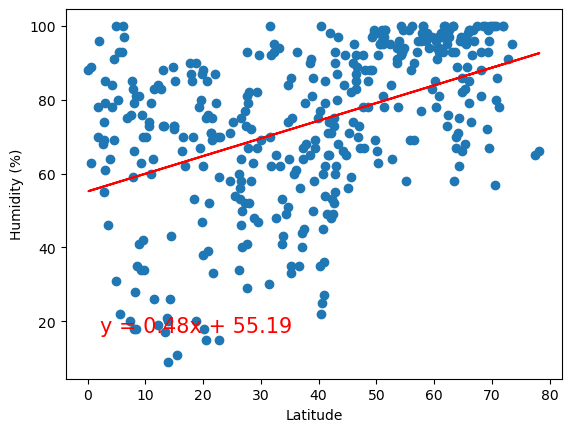

In [94]:
# Northern Hemisphere
lin2('n','Lat','Humidity (%)')

The p-value is: 4.8314073576741945e-06 < 0.05 -> Data is correlated
The r-value is: 0.3264424143374538


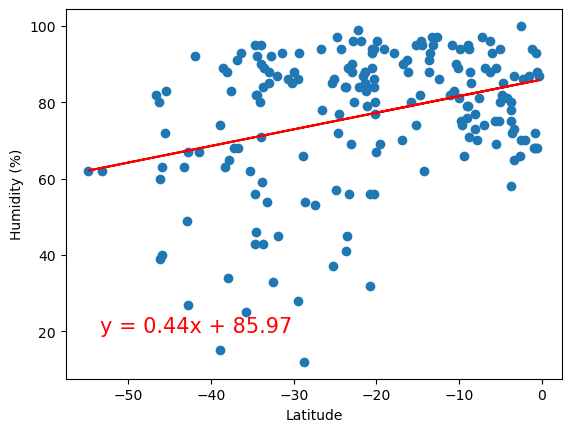

In [95]:
# Southern Hemisphere
lin2('s','Lat','Humidity (%)')

**Discussion about the linear relationship:** In this case here, we see a positive correlation for both plots. Thus, we can say that, regardless of hemisphere, as our Latitude increases (or we go further and further north) our Humidity percentage will increase at a steady rate.

### Cloudiness vs. Latitude Linear Regression Plot

The p-value is: 4.628816741494376e-10 < 0.05 -> Data is correlated
The r-value is: 0.31263594011847157


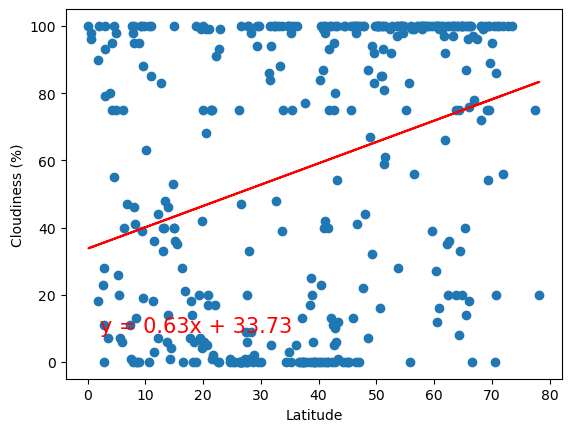

In [96]:
# Northern Hemisphere
lin2('n','Lat','Cloudiness (%)')

The p-value is: 8.292322699724232e-10 < 0.05 -> Data is correlated
The r-value is: 0.42879079858738794


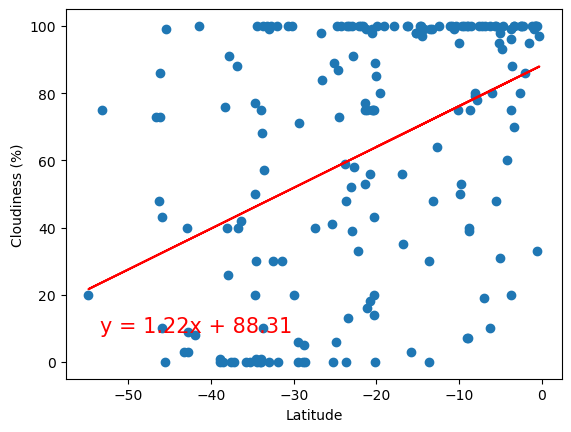

In [97]:
# Southern Hemisphere
lin2('s','Lat','Cloudiness (%)')

**Discussion about the linear relationship:** For cloudiness we again see a positive correlation in both plots, indicating that going further north will result in higher cloudiness percentages. In these plots however, we can see a notably sharper linear increase in the souther hemisphere regression (m = 1.22), than in the northern hemisphere (m = 0.63).

### Wind Speed vs. Latitude Linear Regression Plot

The p-value is: 0.9394670899776534 >= 0.05 -> Data is uncorrelated
The r-value is: -0.003908484738200026


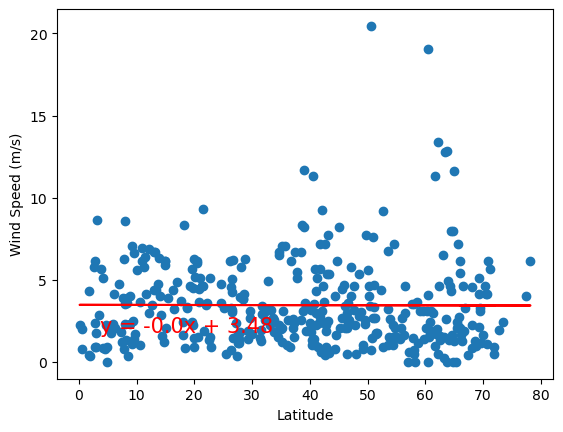

In [98]:
# Northern Hemisphere
lin2('n','Lat','Wind Speed (m/s)')

The p-value is: 0.000731997194797628 < 0.05 -> Data is correlated
The r-value is: -0.2442040395011112


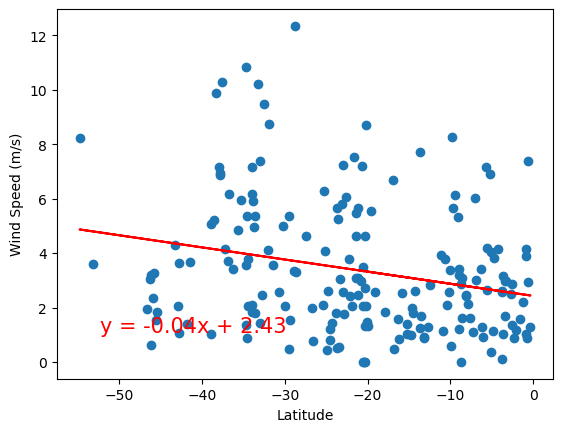

In [99]:
# Southern Hemisphere
lin2('s','Lat','Wind Speed (m/s)')

**Discussion about the linear relationship:** In our final plots, we can see for the northern hemisphere that our regression has a rate (m = -0.0), and furthermore that we have a p-value of 0.9394670899776534 >= 0.05, which would indicate that our data here is not in fact correlated. For the southern hemisphere, we obtain a weak negative correlation with regression rate (m = -0.04) and we also obtain a p-value of 0.000731997194797628 < 0.05, which does indicate our data is correlated, albeit weakly in this case.